In [7]:
# Import library utama
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Periksa versi TensorFlow
print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.18.0


In [8]:
# Memuat dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Melihat bentuk data
print(f"Shape X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, y_test: {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 141s 1us/step
Shape X_train: (50000, 32, 32, 3), y_train: (50000, 1)
Shape X_test: (10000, 32, 32, 3), y_test: (10000, 1)


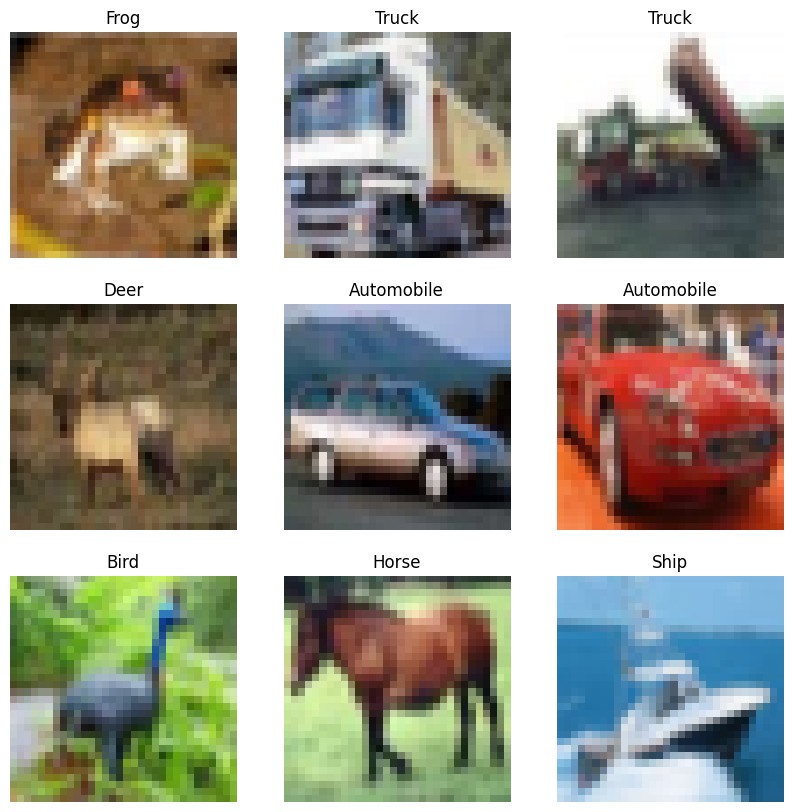

In [9]:
# Daftar label kelas
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Menampilkan 9 gambar pertama
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [10]:
# Normalisasi data ke range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0


In [11]:
# Membangun model CNN
model = models.Sequential([
    # Lapisan Konvolusi dan Pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Lapisan Flatten dan Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer untuk 10 kelas
])

# Menampilkan ringkasan model
model.summary()


c:\Users\ASUS Vivobook\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
# Melatih model
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.3244 - loss: 1.8207 - val_accuracy: 0.5241 - val_loss: 1.3155
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5493 - loss: 1.2717 - val_accuracy: 0.6077 - val_loss: 1.1059
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6152 - loss: 1.0917 - val_accuracy: 0.6341 - val_loss: 1.0427
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6556 - loss: 0.9787 - val_accuracy: 0.6597 - val_loss: 0.9676
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6793 - loss: 0.9145 - val_accuracy: 0.6735 - val_loss: 0.9470
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7049 - loss: 0.8456 - val_accuracy: 0.6826 - val_loss: 0.9203
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7186 - loss: 0.8066 - val_accuracy: 0.6879 - val_loss: 0.8971
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7339 - loss: 0.7579 - 

In [14]:
# Evaluasi pada data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Akurasi pada data uji: {test_accuracy * 100:.2f}%")


313/313 - 1s - 3ms/step - accuracy: 0.6972 - loss: 0.9257
Akurasi pada data uji: 69.72%


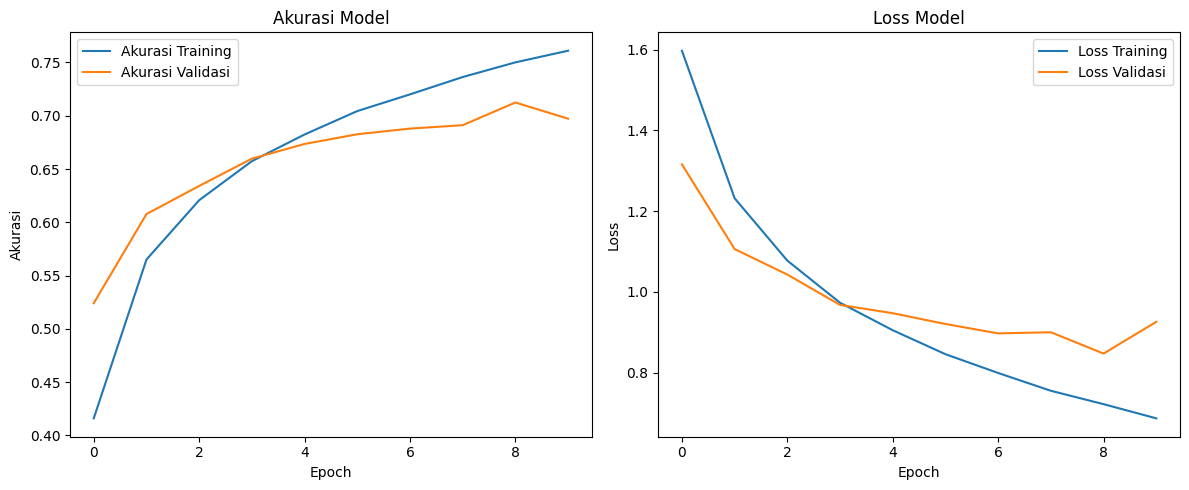

In [15]:
# Plot akurasi dan loss
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.title('Akurasi Model')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Model')

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


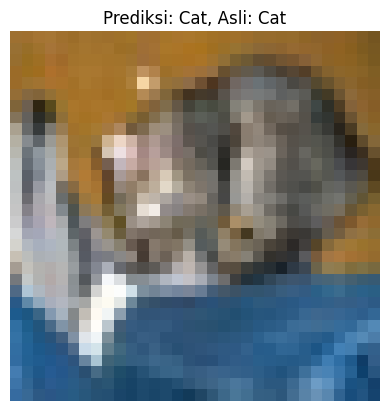

In [16]:
# Prediksi
predictions = model.predict(X_test)

# Menampilkan prediksi pada gambar pertama
index = 0  # Ubah index untuk melihat gambar lain
plt.imshow(X_test[index])
plt.title(f"Prediksi: {class_names[np.argmax(predictions[index])]}, Asli: {class_names[y_test[index][0]]}")
plt.axis('off')
plt.show()


In [17]:
# Menyimpan model
model.save('cifar10_cnn_model.h5')

# Memuat model
# model = tf.keras.models.load_model('cifar10_cnn_model.h5')
